0. Импорт важных элементов

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from IPython.display import display

## ПУНКТ 1. Анализ данных в Python (pandas и numpy)

In [ ]:
order_details = pd.read_csv('/content/sample_data/order_details.csv', encoding='latin1')
orders = pd.read_csv('/content/sample_data/orders.csv', encoding='latin1')
pizzas = pd.read_csv('/content/sample_data/pizzas.csv', encoding='latin1')
pizza_types = pd.read_csv('/content/sample_data/pizza_types.csv', encoding='latin1')

## Merge

In [ ]:
df = pd.merge(order_details, orders, on='order_id', how='left')
df = pd.merge(df, pizzas, on='pizza_id', how='left')
df = pd.merge(df, pizza_types, on='pizza_type_id', how='left')

## A. Загрузка и первичный обзор

In [ ]:
display(df.head())
display(df.tail())

print("СТРУКТУРА ДАННЫХ:")
display(df.info())

print("ТИПЫ ДАННЫХ:")
display(df.dtypes.to_frame(name=''))

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo..."
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,..."
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."
48619,48620,21350,bbq_ckn_s,1,2015-12-31,23:02:05,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."


СТРУКТУРА ДАННЫХ:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   date              48620 non-null  object 
 5   time              48620 non-null  object 
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


None

ТИПЫ ДАННЫХ:


,
order_details_id,int64
order_id,int64
pizza_id,object
quantity,int64
date,object
time,object
pizza_type_id,object
size,object
price,float64
name,object


## B. Обработка данных

1. Пропущенные значения

In [ ]:
mssv = df.isnull().sum()
display(mssv.to_frame())

for col in df.columns:
    if df[col].isnull().any():
        if df[col].dtype in ['int64', 'float64']:
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna(df[col].mode()[0])

,0
order_details_id,0
order_id,0
pizza_id,0
quantity,0
date,0
time,0
pizza_type_id,0
size,0
price,0
name,0


2. Дубликаты

In [ ]:
dpl = df.duplicated().sum()
print(f"Дубликатов: {dpl}")

if dpl > 0:
    df = df.drop_duplicates()
    print(f"Удалено: {dpl}")

Дубликатов: 0


3. Выбросы (при необходимости)

quantity: 927 выбросов
price: 28 выбросов


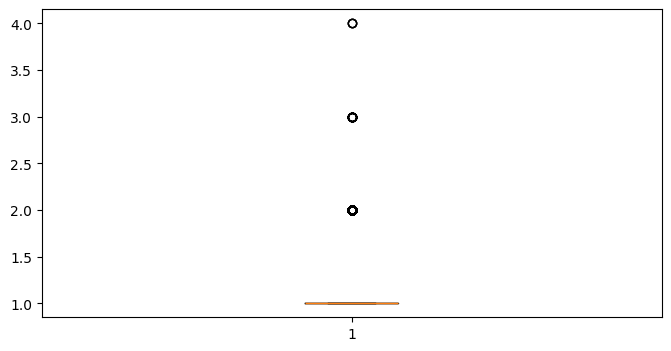

In [ ]:
nmr = df.select_dtypes(include=[np.number]).columns

for n in nmr:
    avg = df[n].mean()
    std = df[n].std()
    z = np.abs((df[n] - avg) / std)
    otlr = (z > 3).sum()
    if otlr > 0:
        print(f"{n}: {otlr} выбросов")

import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.boxplot(df['quantity'])
plt.show()

## C. Визуализация данных

Гистограммы распределений

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df['revenue'] = df['quantity'] * df['price']

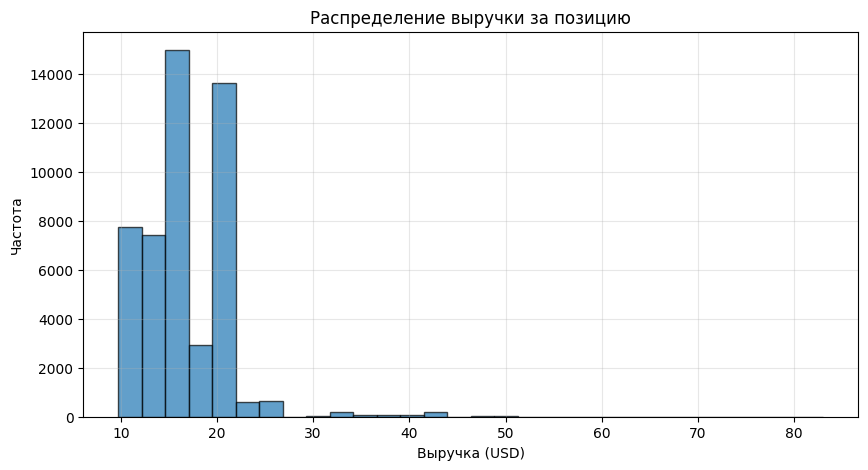

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(df['revenue'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Распределение выручки за позицию')
plt.xlabel('Выручка (USD)')
plt.ylabel('Частота')
plt.grid(True, alpha=0.3)
plt.show()

Линейный график

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month

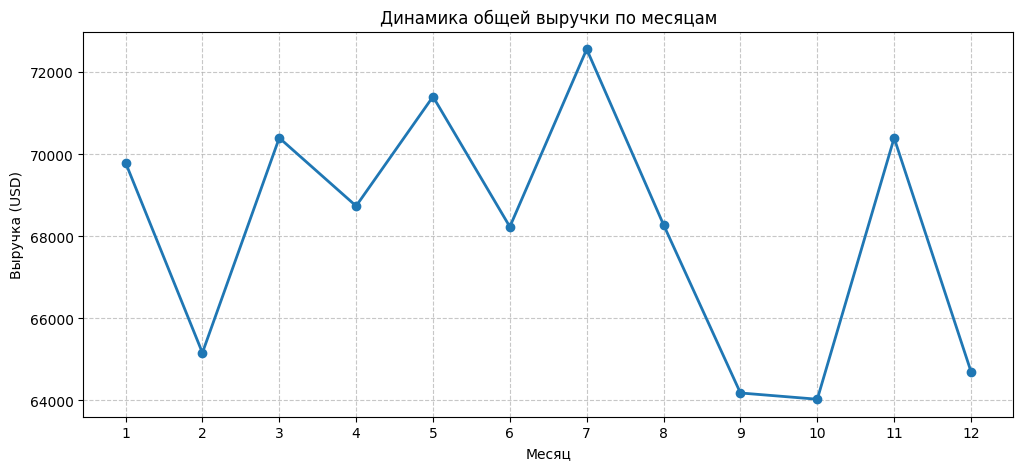

In [ ]:
plt.figure(figsize=(12, 5))
monthly_revenue = df.groupby('month')['revenue'].sum()
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linewidth=2)
plt.title('Динамика общей выручки по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Выручка (USD)')
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Столбчатые диаграммы

In [ ]:
top_pizzas_names = df.groupby('name')['quantity'].sum().nlargest(10)


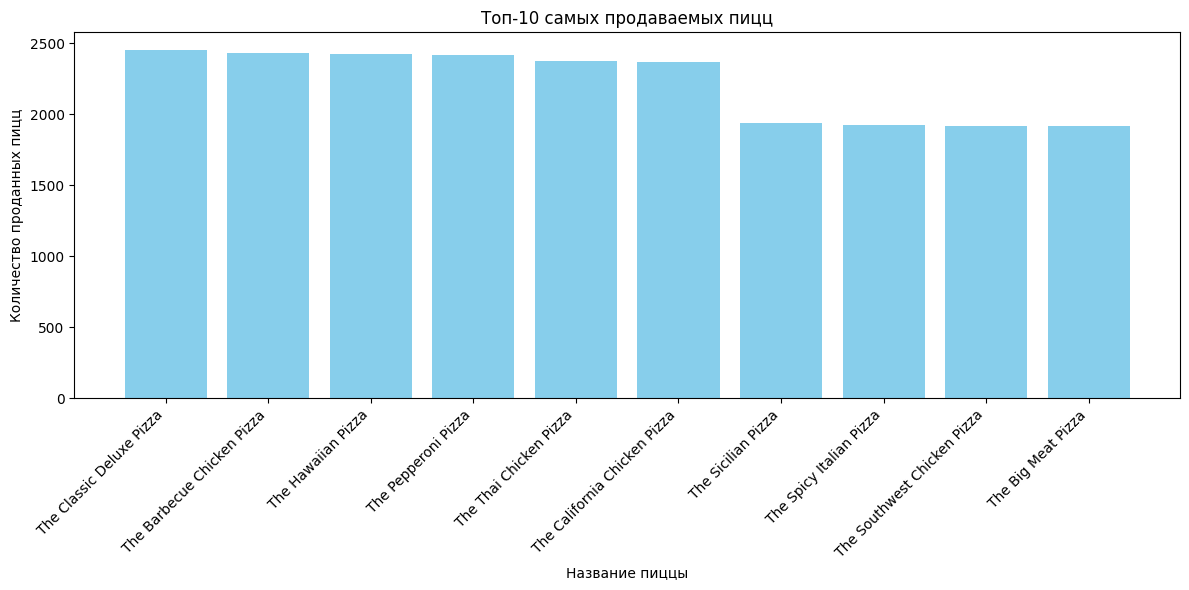

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(top_pizzas_names.index, top_pizzas_names.values, color='skyblue')
plt.title('Топ-10 самых продаваемых пицц')
plt.xlabel('Название пиццы')
plt.ylabel('Количество проданных пицц')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Boxplot

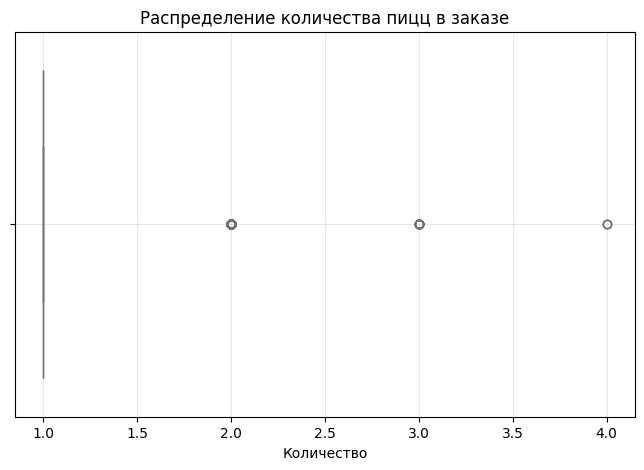

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='quantity', color='lightgreen')
plt.title('Распределение количества пицц в заказе')
plt.xlabel('Количество')
plt.grid(True, alpha=0.3)
plt.show()

Heatmap корреляций

In [ ]:
numeric_cols = ['quantity', 'price', 'revenue']
correlation_matrix = df[numeric_cols].corr()

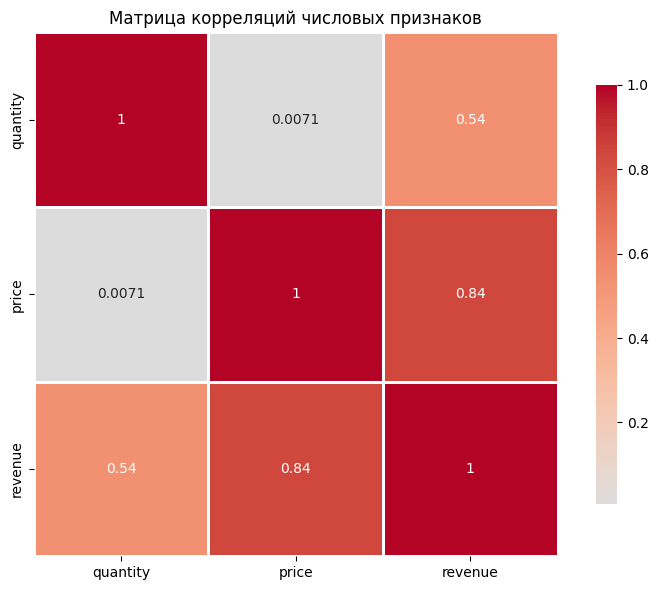

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Матрица корреляций числовых признаков')
plt.tight_layout()
plt.show()

## D. Группировки и агрегации

среднее по группам

In [ ]:
agg1 = df.groupby('category').agg({
    'revenue': 'mean'
}).round(2).rename(columns={'revenue': 'avg_revenue'})

print("Средняя выручка по категориям:")
display(agg1)

Средняя выручка по категориям:


,avg_revenue
category,
Chicken,18.12
Classic,15.09
Supreme,17.68
Veggie,16.92


 медиана по группам

In [ ]:
df['day_of_week'] = pd.to_datetime(df['date']).dt.day_name()

In [ ]:
agg2 = df.groupby('size').agg({
    'price': 'median'
}).round(2).rename(columns={'price': 'median_price'})

print("\n2. Медианная цена по размерам:")
display(agg2)


2. Медианная цена по размерам:


,median_price
size,
L,20.50
M,16.25
S,12.00
XL,25.50
XXL,35.95


подсчёт количества

In [ ]:
agg3 = df.groupby('day_of_week').agg({
    'order_id': 'nunique'
}).rename(columns={'order_id': 'orders_count'})

print("\n3. Количество заказов по дням недели:")
display(agg3)


3. Количество заказов по дням недели:


,orders_count
day_of_week,
Friday,3538
Monday,2794
Saturday,3158
Sunday,2624
Thursday,3239
Tuesday,2973
Wednesday,3024


суммирование

In [ ]:
agg4 = df.groupby('month').agg({
    'quantity': 'sum'
}).rename(columns={'quantity': 'total_pizzas'})

print("\n4. Суммарное количество пицц по месяцам:")
display(agg4)


4. Суммарное количество пицц по месяцам:


,total_pizzas
month,
1,4232
2,3961
3,4261
4,4151
5,4328
6,4107
7,4392
8,4168
9,3890


построение сводной таблицы (pivot_table)

In [ ]:
pivot_table = pd.pivot_table(
    df,
    values='revenue',
    index='month',
    columns='category',
    aggfunc='sum',
    fill_value=0
).round(2)

print("\n5. Сводная таблица (месяц × категория):")
display(pivot_table)


5. Сводная таблица (месяц × категория):


category,Chicken,Classic,Supreme,Veggie
month,,,,
1,16188.75,18619.40,17929.75,17055.40
2,15468.25,17336.10,16718.85,15636.40
3,17625.50,18116.60,17319.65,17335.35
4,16473.00,18816.80,17643.55,15803.45
5,16752.25,19423.10,18315.65,16911.75
6,16086.50,18035.90,18097.25,16010.55
7,17002.25,19653.00,18216.85,17685.80
8,16352.50,18821.90,17093.45,16010.40
9,16039.00,17832.85,15295.60,15012.60


## Переходим в Yandex DataLens

In [ ]:
df.to_csv('pizza_sales_merged.csv', index=False)